In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

# Spatial Filtering Prelab Q2

Hamish Johnson\
SFU Spring 2022\
PHYS 332W

## Base Case (a)

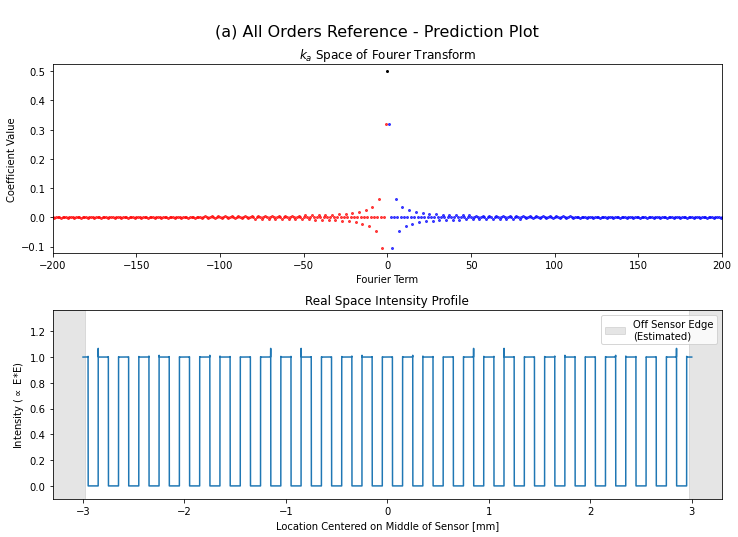

In [ ]:
# Ronchi Runing Spacing
a = 0.2 ## mm

# generate Fourier Coefficients for gratting
posArray = []
negArray = []
N = 20000 # number of fourier terms in either direction from 0
for _ in range(N):
    _ += 1
    term = (-1)**((_+1)/2+1)/(_*np.pi)
    if _%2 == 0:
        posArray.append(0)
        negArray.append(0)
    else:
        posArray.append(term)
        negArray.append(term)
        
Fmax = np.max(np.concatenate((posArray,negArray,[t0]),axis = 0))
Fmin = np.min(np.concatenate((posArray,negArray,[t0]),axis = 0))

posArray = np.array(posArray)
negArray = np.array(negArray)
pos_indexes = np.arange(len(posArray))
neg_indexes = np.arange(len(negArray))

# Define fxn to compute fourier series results
def FourrierFunc_Intensity(x,a,t0,posArray,negArray):
    k = 2*np.pi/a
    outArray = []
    enumArrayP = np.arange(1,len(posArray)+1)
    enumArrayN = np.arange(1,len(negArray)+1)
    for x_val in x:
        positives = np.sum( posArray * np.exp( (-1j*(enumArrayP)*k*x_val) ) )
        negatives = np.sum( negArray * np.exp( ( 1j*(enumArrayN)*k*x_val) ) )
        total = t0 + positives + negatives
        
        outArray.append(total*np.conjugate(total))
    return np.array(outArray)

#Creating 2 row and 1 columns grid
gs = gridspec.GridSpec(2, 1,hspace=0.3)
fig = plt.figure(figsize = (12,8))
axF = plt.subplot(gs[0,0])
axR = plt.subplot(gs[1,0])

# Plot Fourier Coeffs
axF.plot(pos_indexes+1,posArray,"b.",alpha = 0.7,markersize = 4)
axF.plot(-neg_indexes-1,negArray,"r.",alpha = 0.7,markersize =4)
axF.plot(0,t0,'k.',markersize = 4)
axF.set(xlim = (-N/100,N/100),ylim = (Fmin*1.15,Fmax*1.05),
        xlabel = "Fourier Term", ylabel = "Coefficient Value",
        title = r"$k_a$ Space of Fourer Transform")

# Plot Real space image
sensorMaxEdge = 5.95585/2 # mm
x_min = -15*a
x_max = 15*a
xspace = np.linspace(x_min,x_max,10000)
yspace = np.real(FourrierFunc_Intensity(xspace,a,t0,posArray,negArray))
ylimits = (np.min(yspace)-0.1,np.max(yspace)+0.3)
axR.set(xlabel = "Location Centered on Middle of Sensor [mm]", ylabel = "Intensity ($\propto$ E*E)",
        title = "Real Space Intensity Profile",xlim = (x_min*1.1,x_max*1.1),ylim = ylimits)
axR.plot(xspace,yspace)
# sensor is approx 5.95585 mm accross so lets darken the other area
axR.axvspan(-10,-sensorMaxEdge,color = "k",alpha = 0.1,label = "Off Sensor Edge\n(Estimated)")
axR.axvspan(10,sensorMaxEdge,color = "k",alpha = 0.1)
axR.legend(loc = "upper right")

figName = "\n(a) All Orders Reference - Prediction Plot"
fileName = figName.replace(' ','_').replace('-_','') + ".pdf"
fig.suptitle(figName, size=16)
plt.savefig(fileName,dpi=300)
plt.show()

## Remaining Cases (b)-(l)

In [ ]:
# Define a temporary function that does the plotting
# above for a custom set of fourier coefficients using
# the values defined above. This is simply to speed things up.
def tempFxnToSpeedThingsUp(T0,new_posArray,new_negArray,figName):
    #Creating 2 row and 1 columns grid
    gs = gridspec.GridSpec(2, 1,hspace=0.3)
    fig = plt.figure(figsize = (12,8))
    axF = plt.subplot(gs[0,0])
    axR = plt.subplot(gs[1,0])

    # Plot Fourier Coeffs
    axF.plot(pos_indexes+1,new_posArray,"b.",alpha = 0.7,markersize = 4)
    axF.plot(-neg_indexes-1,new_negArray,"r.",alpha = 0.7,markersize =4)
    axF.plot(0,T0,'k.',markersize = 4)
    axF.set(xlim = (-N/100,N/100),ylim = (Fmin*1.15,Fmax*1.05),
            xlabel = "Fourier Term", ylabel = "Coefficient Value",
            title = r"$k_a$ Space of Fourer Transform")

    # Plot Real space image
    sensorMaxEdge = 5.95585/2 # mm
    x_min = -15*a
    x_max = 15*a
    xspace = np.linspace(x_min,x_max,10000)
    yspace = np.real(FourrierFunc_Intensity(xspace,a,T0,new_posArray,new_negArray))
    axR.set(xlabel = "Location Centered on Middle of Sensor [mm]", ylabel = "Intensity ($\propto$ E*E)",
            title = "Real Space Intensity Profile",xlim = (x_min*1.1,x_max*1.1),ylim = ylimits)
    axR.plot(xspace,yspace)
    # sensor is approx 5.95585 mm accross so lets darken the other area
    axR.axvspan(-10,-sensorMaxEdge,color = "k",alpha = 0.1,label = "Off Sensor Edge\n(Estimated)")
    axR.axvspan(10,sensorMaxEdge,color = "k",alpha = 0.1)
    axR.legend(loc = "upper right")

    fileName = figName.replace(' ','_').replace('-_','') + ".pdf"
    fig.suptitle(figName, size=16)
    plt.savefig(fileName,dpi=300)
    plt.show()

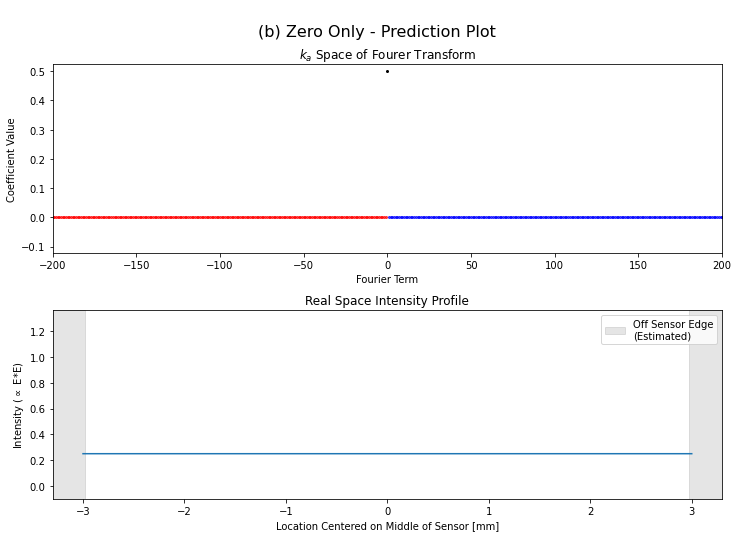

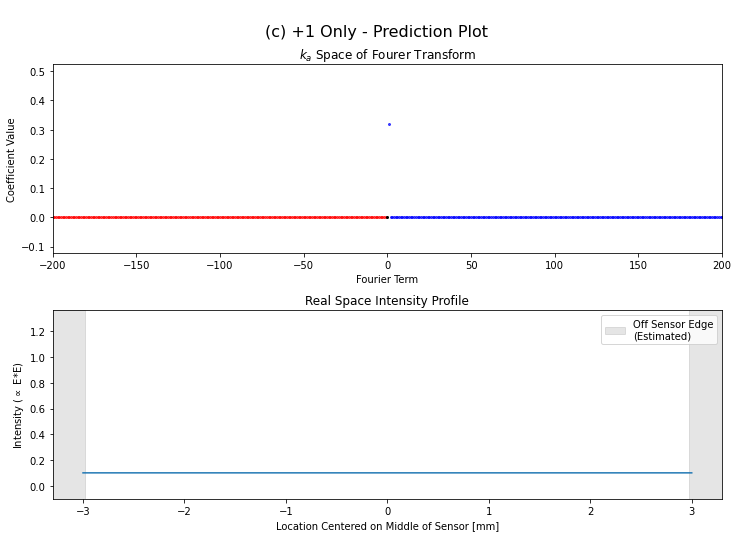

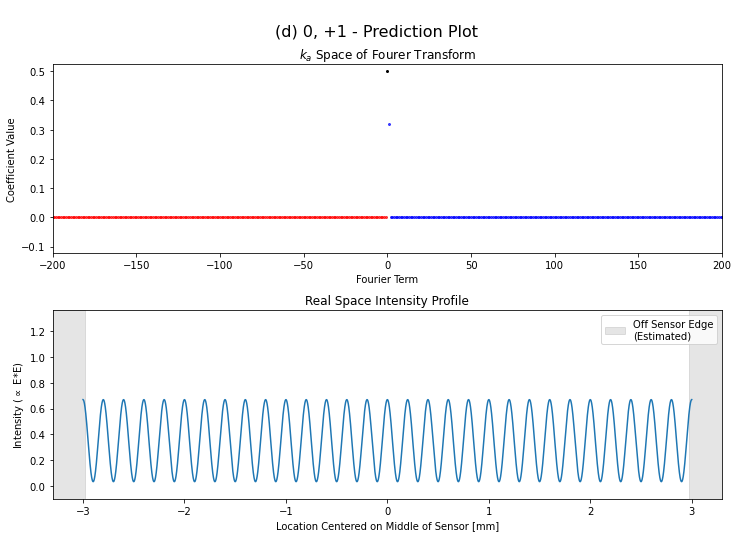

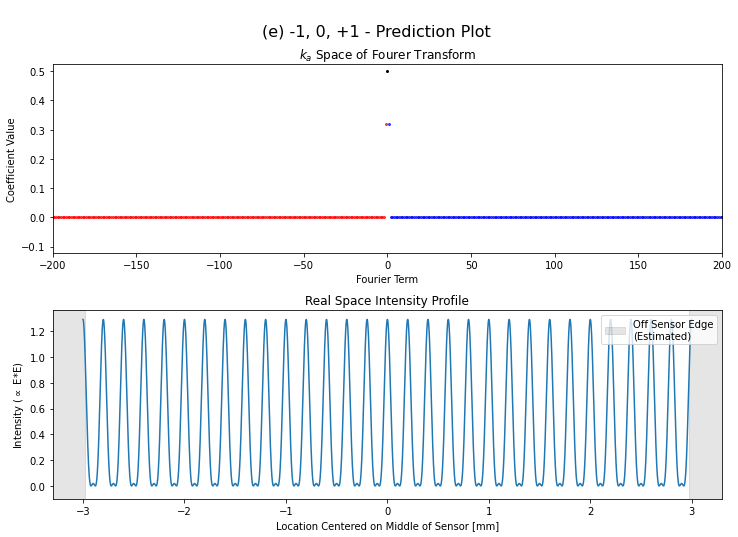

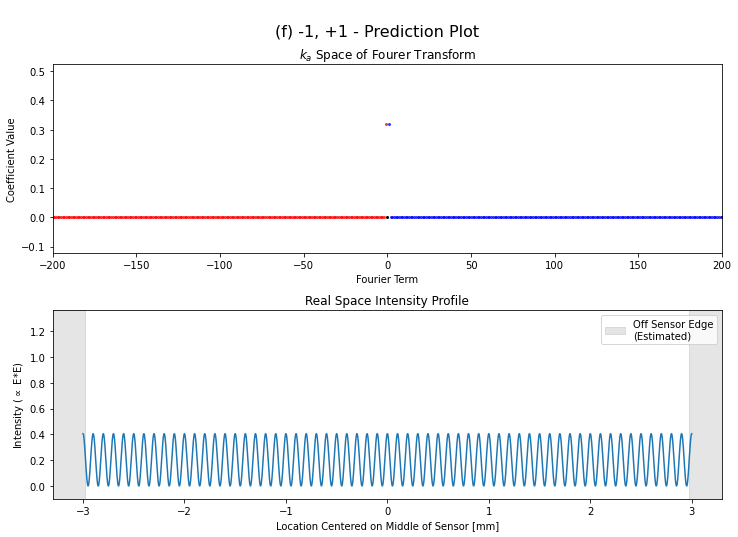

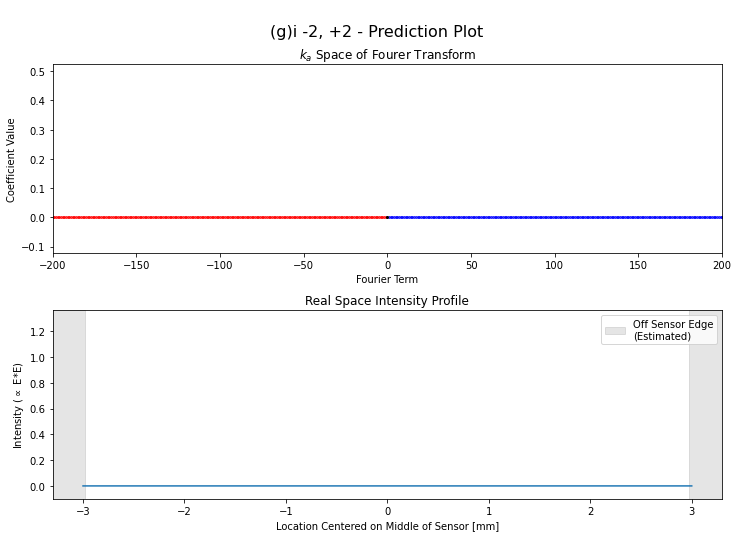

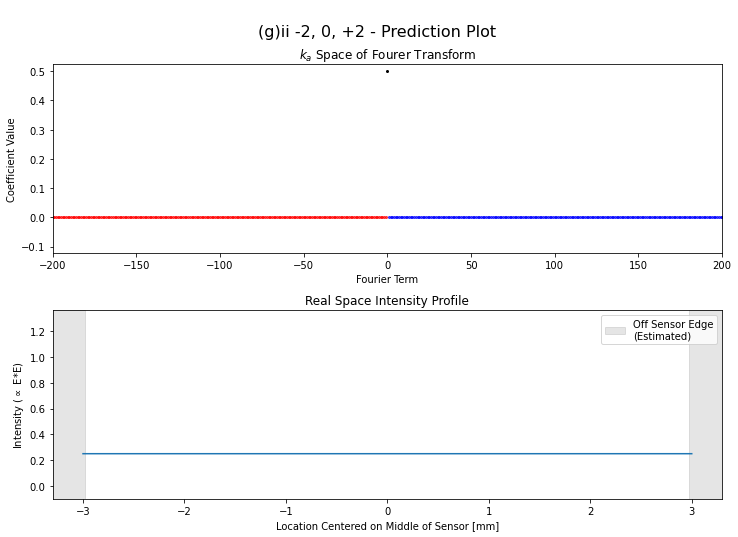

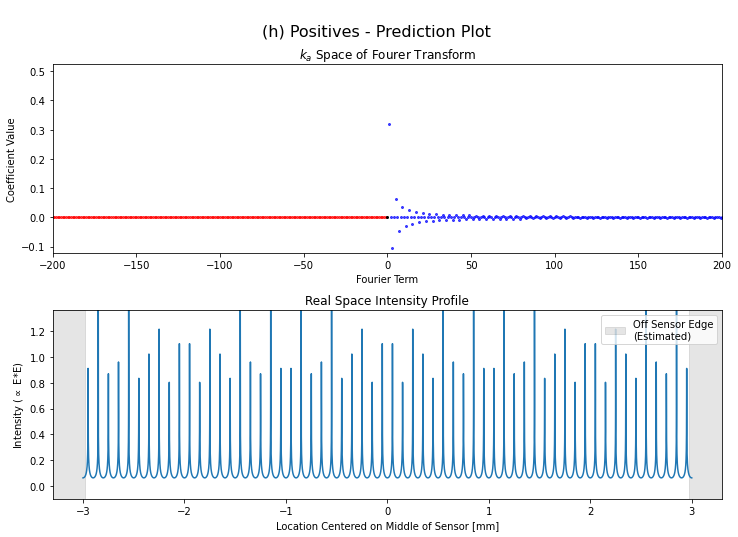

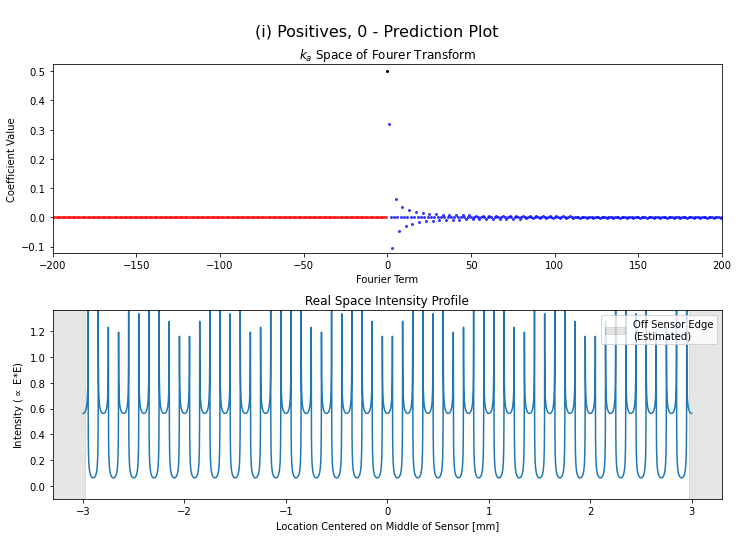

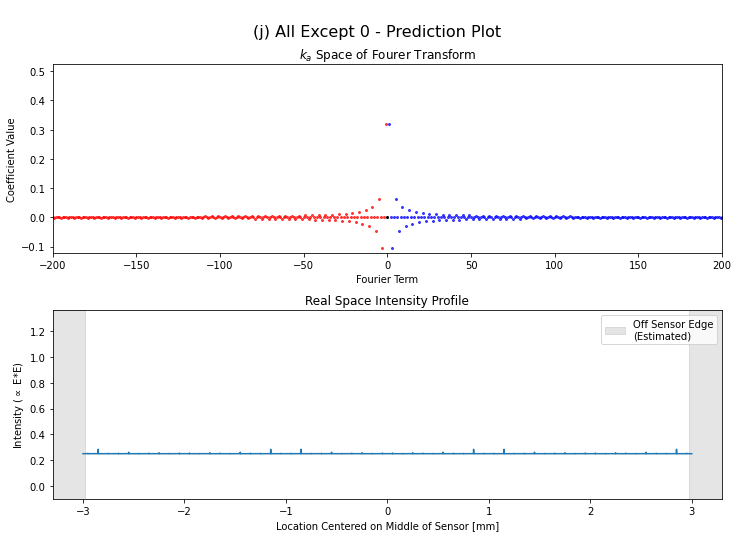

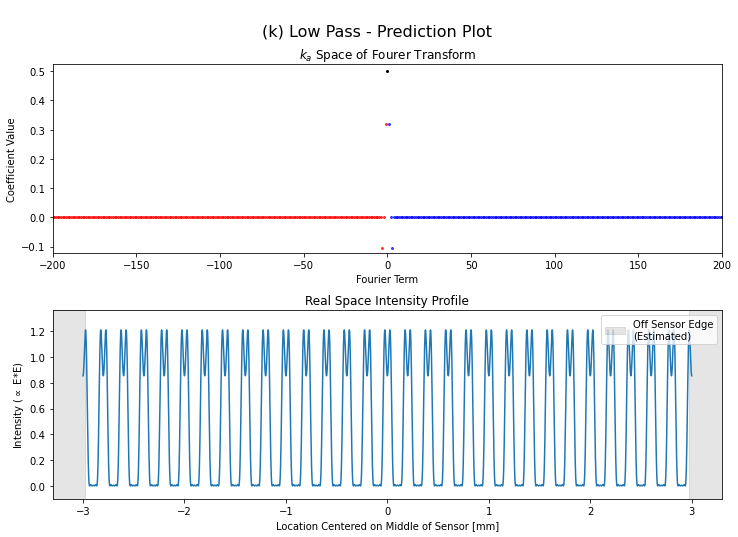

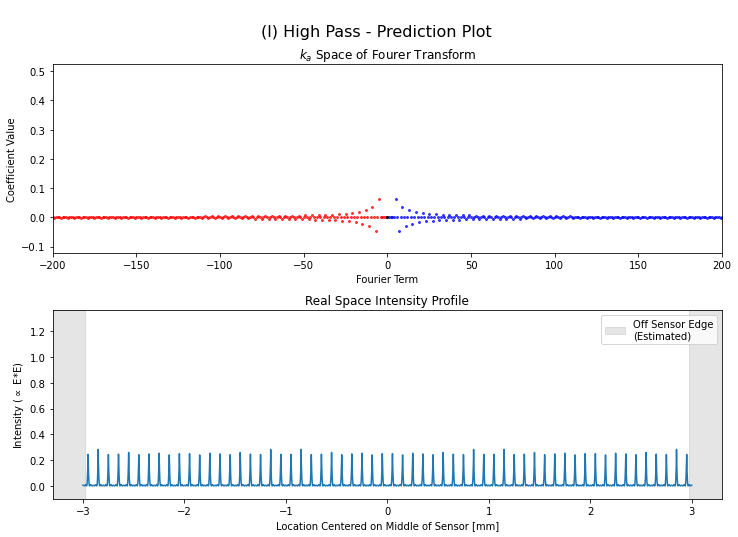

In [ ]:
# Modify here ############################################## B
T0 = t0*1
new_posArray = np.where(False , posArray, 0)
new_negArray = np.where(False , negArray, 0)

figName = "\n(b) Zero Only - Prediction Plot"
############################################################
# Dont Touch this !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
tempFxnToSpeedThingsUp(T0,new_posArray,new_negArray,figName)
# !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!


# Modify here ############################################## C
T0 = t0*0
new_posArray = np.where(pos_indexes == 0 , posArray, 0)
new_negArray = np.where(False , negArray, 0)

figName = "\n(c) +1 Only - Prediction Plot"
############################################################
# Dont Touch this !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
tempFxnToSpeedThingsUp(T0,new_posArray,new_negArray,figName)
# !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!


# Modify here ############################################## D
T0 = t0
new_posArray = np.where(pos_indexes == 0 , posArray, 0)
new_negArray = np.where(False , negArray, 0)

figName = "\n(d) 0, +1 - Prediction Plot"
############################################################
# Dont Touch this !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
tempFxnToSpeedThingsUp(T0,new_posArray,new_negArray,figName)
# !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!


# Modify here ############################################## E
T0 = t0
new_posArray = np.where(pos_indexes == 0 , posArray, 0)
new_negArray = np.where(neg_indexes == 0 , negArray, 0)

figName = "\n(e) -1, 0, +1 - Prediction Plot"
############################################################
# Dont Touch this !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
tempFxnToSpeedThingsUp(T0,new_posArray,new_negArray,figName)
# !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!


# Modify here ############################################## F
T0 = t0*0
new_posArray = np.where(pos_indexes == 0 , posArray, 0)
new_negArray = np.where(neg_indexes == 0 , negArray, 0)

figName = "\n(f) -1, +1 - Prediction Plot"
############################################################
# Dont Touch this !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
tempFxnToSpeedThingsUp(T0,new_posArray,new_negArray,figName)
# !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!


# Modify here ############################################## G
T0 = t0*0
new_posArray = np.where(pos_indexes == 1 , posArray, 0)
new_negArray = np.where(neg_indexes == 1 , negArray, 0)

figName = "\n(g)i -2, +2 - Prediction Plot"
############################################################
# Dont Touch this !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
tempFxnToSpeedThingsUp(T0,new_posArray,new_negArray,figName)
# !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!


# Modify here ############################################## G
T0 = t0
new_posArray = np.where(pos_indexes == 1 , posArray, 0)
new_negArray = np.where(neg_indexes == 1 , negArray, 0)

figName = "\n(g)ii -2, 0, +2 - Prediction Plot"
############################################################
# Dont Touch this !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
tempFxnToSpeedThingsUp(T0,new_posArray,new_negArray,figName)
# !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!


# Modify here ############################################## H
T0 = t0*0
new_posArray = np.where(True  , posArray, 0)
new_negArray = np.where(False , negArray, 0)

figName = "\n(h) Positives - Prediction Plot"
############################################################
# Dont Touch this !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
tempFxnToSpeedThingsUp(T0,new_posArray,new_negArray,figName)
# !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!


# Modify here ############################################## I
T0 = t0
new_posArray = np.where(True , posArray, 0)
new_negArray = np.where(False , negArray, 0)

figName = "\n(i) Positives, 0 - Prediction Plot"
############################################################
# Dont Touch this !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
tempFxnToSpeedThingsUp(T0,new_posArray,new_negArray,figName)
# !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!


# Modify here ############################################## J
T0 = t0*0
new_posArray = np.where(True , posArray, 0)
new_negArray = np.where(True , negArray, 0)

figName = "\n(j) All Except 0 - Prediction Plot"
############################################################
# Dont Touch this !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
tempFxnToSpeedThingsUp(T0,new_posArray,new_negArray,figName)
# !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!


# Modify here ############################################## K
T0 = t0
new_posArray = np.where(pos_indexes <= 2 , posArray, 0)
new_negArray = np.where(neg_indexes <= 2 , negArray, 0)

figName = "\n(k) Low Pass - Prediction Plot"
############################################################
# Dont Touch this !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
tempFxnToSpeedThingsUp(T0,new_posArray,new_negArray,figName)
# !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!


# Modify here ############################################## L
T0 = t0*0
new_posArray = np.where(pos_indexes > 2 , posArray, 0)
new_negArray = np.where(neg_indexes > 2 , negArray, 0)

figName = "\n(l) High Pass - Prediction Plot"
############################################################
# Dont Touch this !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
tempFxnToSpeedThingsUp(T0,new_posArray,new_negArray,figName)
# !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=105ac642-5bd3-436e-9985-a9ec79bce1b9' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>